<a href="https://colab.research.google.com/github/shizoda/education/blob/main/machine_learning/cnn/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎨 AIは「計算」する：CNNによる画像分類と学習の可視化

こんにちは。このノートブックでは、AI（人工知能）がどのようにして画像を見分ける（**クラス分類**）ようになるのかを、一緒に体験していきます。

## 🤖 1. AIは「思考」ではなく「計算」をしている

AIというと、まるで人間のように「考えて」いるように思えますが、現在のAI（特にディープラーニング）の正体は、膨大な **「計算」** です。

* **入力：** 画像（たくさんのピクセルの集まり＝数値）
* **処理：** モデル（計算のルールを詰め込んだもの）が、入力された数値を次々と計算
* **出力：** 計算結果（例：「この画像が『ネコ』である確率は80%」といった数値）

AIの「学習」とは、この**計算ルール（モデルの中身）を、目的に合わせて少しずつ調整していく作業**のことです。

## 📁 2. データの準備と歴史：「特徴」をどう見つけるか

画像を分類するためには、画像の中の「特徴」を見つける必要があります。

### 📜 AIの歴史：特徴抽出の自動化

* **昔（～2010年頃）：**
    人間が「特徴とは何か」を必死に考えていました。「ネコの特徴は、三角の耳と丸い目だ」といったルール（**特徴量**）を人間が手動で設計し、AI（当時はサポートベクターマシンなどが主流）に教えていました。
* **今（ディープラーニングの時代）：**
    人間が特徴を設計するのではなく、AI自身がデータ（大量の画像）から「分類に役立つ特徴」を自動で見つけ出すようになりました。その代表的な手法が **CNN（畳み込みニューラルネットワーク）** です。

### 📚 教師あり学習：お手本（教師）データで学ぶ

今回は「**教師あり学習**」という方法を使います。これは、AIに「問題（画像）」と「正解（ラベル）」のペアをたくさん見せて学習させる方法です。

データは以下の3種類に分けて使います。
1.  **教師データ (Training data):**
    学習に使うメインのデータ。AIはこれを見て計算ルールを調整します。
2.  **検証データ (Validation data):**
    学習の途中で「今の実力」を試すためのデータ。学習の「やりすぎ」（過学習）を防ぐために使います。
3.  **テストデータ (Test data):**
    学習には一切使わない、最後の実力テスト用のデータ。これでAIの最終的な性能を評価します。

ここでは「CIFAR-10」という、10種類の画像（飛行機、車、鳥、猫など）を集めたデータセットを使います。

## 🛠️ 3. 準備：ライブラリと関数の読み込み

（このセルは、Pythonやプログラミングに詳しくない方は、中身を見ずに実行だけしてください。「準備のおまじない」のようなものです）

ここでは、AIを作るための道具（ライブラリ）を読み込みます。AIの計算、データの可視化（Matplotlib）、Colabのフォーム機能など、様々な機能を使います。

### 🤖 AIの計算エンジン：代表的なライブラリ

AI（特にディープラーニング）を作るには、複雑な計算を高速に行うための専門のライブラリ（フレームワーク）が必要です。代表的なものとして、**TensorFlow**、**PyTorch**、**scikit-learn** があります。


* **scikit-learn (サイキット・ラーン):**
    * ディープラーニングが登場する前から広く使われている、伝統的な機械学習ライブラリです。
    * 今回のt-SNE（データの可視化）やデータの前処理のように、ディープラーニングの「補助」としても活躍します。


* **TensorFlow (テンソルフロー):**
    * Googleが開発したフレームワークで、非常に有名です。
    * 特に、作ったAIを実際の製品やサービスに組み込む（デプロイ）ための機能が充実しています。

* **PyTorch (パイトーチ):**
    * Facebook (現Meta) が開発しました。
    * Pythonの書き方に近く、プログラムがどう動いているかステップごとに確認しやすい（「Define-by-Run」という特徴）ため、学習や研究で人気があります。
    * モデルの構造を柔軟に変更しやすいのも特徴です。

---

### 🧠 今回使用する「PyTorch」

このノートブックでは、上記の中から **PyTorch** を使います。
研究や学習の分野で人気が高く、AIがどのような計算を行っているかを直感的に理解するのに適しているためです。

<a title="PyTorch, BSD &lt;http://opensource.org/licenses/bsd-license.php&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:PyTorch_logo_black.svg"><img width="256" alt="PyTorch logo black" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/256px-PyTorch_logo_black.svg.png?20200318230141"></a>

---

### 📊 （発展）t-SNEとは？

「畳み込み」などで取り出された「特徴（たくさんの数値）」は、そのままでは多すぎて人間には理解できません。t-SNEは、そうした高次元のデータを、お互いの「近さ」を保ったまま、2次元のグラフ（散布図）に圧縮してくれる技術です。

使用するデバイス: cuda:0


100%|██████████| 170M/170M [00:03<00:00, 43.2MB/s]


全学習データ: 50000件
  教師データ: 40000件
  検証データ: 10000件
テストデータ: 10000件

準備完了。

--- CIFAR-10 クラスの例 ---


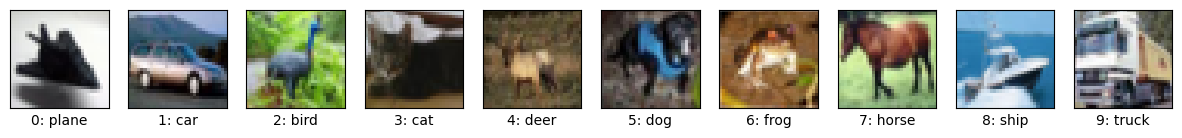

In [2]:
#@title 3-1. 準備コード（ライブラリと関数の読み込み） { display-mode: "code" }
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

# PyTorch (AIの計算フレームワーク)
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Subset

# scikit-learn (t-SNE, 決定境界, データ分割, 標準化)
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 警告を非表示
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# --- PixelsInImage から追加 ---
import cv2
import urllib.request
from matplotlib.colors import LinearSegmentedColormap
# ------------------------------

# デバイス設定 (GPUが使えるか確認)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"使用するデバイス: {device}")

# CIFAR-10のクラス名
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# --- データの前処理と読み込み ---
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 学習用データセットをダウンロード
try:
    trainset_full = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                 download=True, transform=transform)
    # テストデータセットをダウンロード
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
except Exception as e:
    print(f"データセットのダウンロードに失敗しました: {e}")
    print("ネットワーク接続を確認するか、ランタイムを再起動してください。")

# 学習用データセットを「教師データ」と「検証データ」に分割
# 50000件のうち、40000件を教師データ、10000件を検証データに
train_indices, val_indices = train_test_split(
    list(range(len(trainset_full))),
    test_size=0.2, # 20%を検証用
    random_state=42
)
train_dataset = Subset(trainset_full, train_indices)
validation_dataset = Subset(trainset_full, val_indices)

print(f"全学習データ: {len(trainset_full)}件")
print(f"  教師データ: {len(train_dataset)}件")
print(f"  検証データ: {len(validation_dataset)}件")
print(f"テストデータ: {len(testset)}件")

# --- t-SNE と 決定境界のための関数 ---

# 特徴抽出関数
def extract_features(model, dataloader, device):
    model.eval() # 評価モード
    features_list = []
    labels_list = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            # fc2層の出力（84次元）を特徴として抽出
            features = model.extract_features(images)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    all_features = np.concatenate(features_list, axis=0)
    all_labels = np.concatenate(labels_list, axis=0)
    return all_features, all_labels

# t-SNE実行関数
def run_tsne(features, random_state=42):
    # データを標準化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # t-SNE
    # perplexityはデータの密度に依存。サンプル数が多いので40程度に設定
    tsne = TSNE(n_components=2, perplexity=40, random_state=random_state, n_iter=300, verbose=0)
    features_tsne = tsne.fit_transform(features_scaled)
    return features_tsne

# t-SNE可視化関数
def plot_tsne(features_tsne, labels, title):
    df_vis = pd.DataFrame({
        'tsne_x': features_tsne[:, 0],
        'tsne_y': features_tsne[:, 1],
        'label': labels
    })
    df_vis['class_name'] = df_vis['label'].apply(lambda x: classes[x])

    plt.figure(figsize=(10, 8))
    palette = sns.color_palette("tab10", 10)
    sns.scatterplot(
        data=df_vis.sample(frac=1, random_state=42), # 描画順をシャッフル
        x='tsne_x', y='tsne_y',
        hue='class_name',
        palette=palette,
        s=10,
        alpha=0.7,
        legend='full'
    )
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

# 決定境界の可視化関数
def plot_decision_boundary(X_2d, y_2d, mlp_2d, title):
    print("決定境界をプロット中...")

    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    h = (x_max - x_min) / 100 # メッシュの解像度
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = mlp_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 10))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.get_cmap("tab10", 10))

    # データポイントの散布図 (t-SNEと同じ)
    palette = sns.color_palette("tab10", 10)
    sns.scatterplot(
        x=X_2d[:, 0],
        y=X_2d[:, 1],
        hue=y_2d,
        palette=palette,
        s=5,
        alpha=0.5,
        legend='full'
    )

    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [classes[int(label)] for label in labels]
    plt.legend(handles=handles, labels=new_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

# --- PixelsInImage から追加 ---
# ピクセル値を文字として表示し、格子を描画する汎用関数
def show_channel_with_grid_and_values(ax, data, title, cmap='gray', vmin=0, vmax=255):
    ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.axis("off")
    # 格子を描画
    for i in range(data.shape[0] + 1):
        ax.axhline(i - 0.5, color='white', lw=1)
    for j in range(data.shape[1] + 1):
        ax.axvline(j - 0.5, color='white', lw=1)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            # テキストの色を濃度値に応じて変更
            val = data[i, j]
            text_color = "white"
            if cmap == 'gray' and val > 128:
                text_color = 'black'
            elif cmap == 'Red_cmap' and val > 200:
                 text_color = 'black'
            elif cmap == 'Green_cmap' and val > 180:
                text_color = 'black'
            elif cmap == 'Blue_cmap' and val > 180:
                text_color = 'black'

            ax.text(j, i, f"{val:3}", ha="center", va="center", color=text_color, fontsize=10)

# カスタムカラーマップを定義
cdict_red = {'red':   ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)), 'green': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)), 'blue':  ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0))}
Red_cmap = LinearSegmentedColormap('Red_cmap', segmentdata=cdict_red, N=256)
cdict_green = {'red':   ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)), 'green': ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)), 'blue':  ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0))}
Green_cmap = LinearSegmentedColormap('Green_cmap', segmentdata=cdict_green, N=256)
cdict_blue = {'red':   ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)), 'green': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)), 'blue':  ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))}
Blue_cmap = LinearSegmentedColormap('Blue_cmap', segmentdata=cdict_blue, N=256)
# ------------------------------

print("\n準備完了。")


print("\n--- CIFAR-10 クラスの例 ---")

# trainset_full から各クラスの最初の画像を収集
class_images = {}
for img, label in trainset_full:
    if label not in class_images:
        class_images[label] = img
    if len(class_images) == 10:
        break

# 画像の正規化を元に戻す関数 (plt.axis('off') を削除)
def imshow_example(img_tensor):
    img = img_tensor / 2 + 0.5  # 正規化解除
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # plt.axis('off') # <- これを削除し、呼び出し側で制御

# 10クラスの画像を表示 (ソートして 0: plane, 1: car ... の順にする)
plt.figure(figsize=(15, 3))
sorted_labels = sorted(class_images.keys())
for i in sorted_labels:
    ax = plt.subplot(1, 10, i + 1)
    imshow_example(class_images[i])
    # タイトルの代わりに X軸ラベルをキャプションとして使用
    ax.set_xlabel(f"{i}: {classes[i]}")
    # 軸の目盛りを非表示にする
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## 🐍 3-1-1. (演習) Pythonの基本 (1)：インデックス操作

AIのコードに進む前に、Pythonの基本的な操作「インデックス」について、データセットを使って演習してみましょう。

`3-1`のセルで準備した `testset`（テストデータセット）は、Pythonの「リスト」によく似たものです。

* **リスト（List）とは？**
    `[A, B, C, ...]` のように、複数のデータを順番に格納できる「箱」です。

* **インデックス（Index）とは？**
    リストの「**住所（何番目か）**」を示す番号です。Pythonでは、**0番目から**数え始めます。

`testset[0]` のように書くと、0番目のデータ（画像とラベルのペア）が取り出せます。

---
### ⚙️ 演習1：インデックスの値を変更
以下のコードセルにある `selected = testset[0]` の `0` の部分を、好きな数値（0〜9999）に変更して実行してみてください。
指定したインデックス番号に対応する「画像」と「クラス名」がすぐ下に表示されます。

--- 取得したデータを表示 ---
  ラベル番号: 6
  クラス名: frog


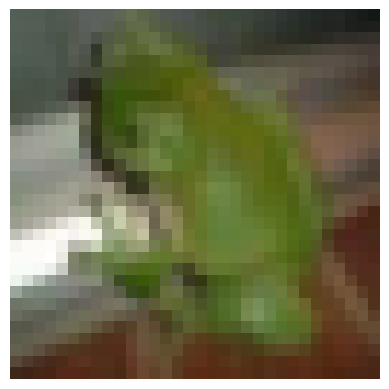

In [17]:
#@title 3-1-1. 演習：インデックス指定によるデータ取得 { display-mode: "code" }

import matplotlib.pyplot as plt
import numpy as np

# testset と classes は 3-1 で定義済みです

# 画像の正規化を元に戻して表示する関数 (中身は読まなくてOK)
def imshow_for_exercise(img_tensor):
    try:
        img = img_tensor / 2 + 0.5  # 正規化解除
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"画像表示エラー: {e}")

# 取得したデータを表示する関数 (中身は読まなくてOK)
def show_selected_data(selected_data):
    try:
        # 1. データをアンパック（画像とラベルに分離）
        img_tensor, label_id = selected_data

        # 2. ラベル番号をクラス名（文字列）に変換
        class_name = classes[label_id]

        # 3. 結果を表示
        print(f"--- 取得したデータを表示 ---")
        print(f"  ラベル番号: {label_id}")
        print(f"  クラス名: {class_name}")

        # 4. 画像を表示
        imshow_for_exercise(img_tensor)

    except NameError:
        print("エラー: 'testset' または 'classes' が見つかりません。")
        print("このセルの前に「3-1. 準備コード」セルを実行してください。")
    except TypeError:
         print("エラー: データが正しく取得できませんでした。")
         print("`testset[番号]` の形式を確認してください。")
    except Exception as e:
        print(f"エラーが発生しました: {e}")


# 課題：インデックスの値を変更してください
# `testset` は 0 から 9999 までのインデックスがあります。
# 以下の `testset[0]` の `0` を好きな数値に変更して実行してください。

# 1. testset からデータを取得 (ここの [0] を変更します)
selected = testset[7]

# 2. 取得したデータを表示（準備コードの関数を呼び出し）
show_selected_data(selected)

## 🖼️ 3-2. 画像とピクセル値

AIが画像を「計算」するとはどういうことか、より具体的に理解するために、画像が「数値の集まり（ピクセル値）」であることを確認します。

以下のセルは、CIFAR-10の画像（32x32ピクセル）を読み込み、スライダーで指定した「関心領域（ROI）」のピクセル値を、R (赤), G (緑), B (青) の各色チャンネルごとに表示するものです。

* `image_index` で画像の番号を指定します。
* `manual_x`, `manual_y` でROIの左上の座標を決めます。
* `manual_width`, `manual_height` でROIのサイズを決めます。

CIFAR-10 画像 0 (cat) の ROI (X=10, Y=10, Size=8x8) を表示します。


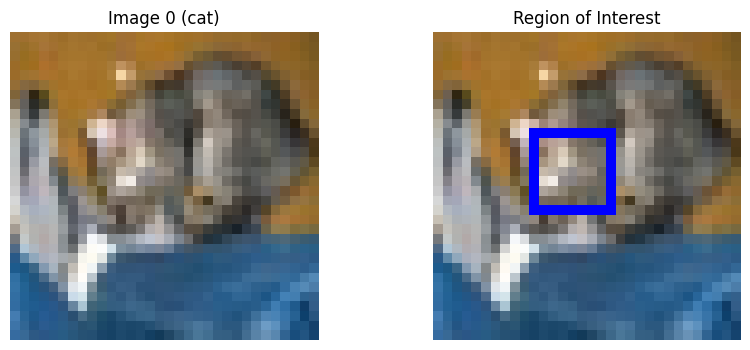

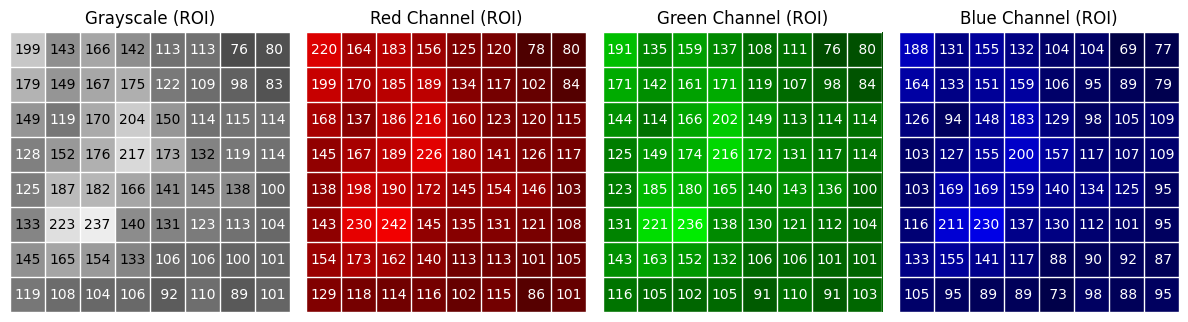

In [3]:
#@title 3-2. ピクセル値の可視化（CIFAR-10画像） { display-mode: "code" }
#@markdown ### 画像インデックスとROIの指定
image_index = 0 #@param {type:"slider", min:0, max:9999, step:1}
roi_x = 10 #@param {type:"slider", min:0, max:31, step:1}
roi_y = 10 #@param {type:"slider", min:0, max:31, step:1}
roi_size = 8 #@param {type:"slider", min:1, max:16, step:1}

# --- CIFAR-10画像データの取得 ---
# testsetは transform (正規化) 済みなので、ピクセル値確認用に
# transformなしのデータセットを再ロード（ダウンロードはキャッシュされる）
transform_vis = transforms.Compose([transforms.ToTensor()])
testset_vis = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform_vis)

# 0-9999 の範囲に補正
image_index = max(0, min(image_index, len(testset_vis)-1))

# (C, H, W) 形式のテンソルを取得
img_tensor, label = testset_vis[image_index]

# (H, W, C) 形式のNumpy配列に変換 (0-1の値)
img_np = img_tensor.permute(1, 2, 0).numpy()
# 0-255 の整数値に変換
img_rgb = (img_np * 255).astype(np.uint8)

# グレースケール変換
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# --- ROIの決定 ---
final_x, final_y, final_w, final_h = roi_x, roi_y, roi_size, roi_size
print(f"CIFAR-10 画像 {image_index} ({classes[label]}) の ROI (X={final_x}, Y={final_y}, Size={roi_size}x{roi_size}) を表示します。")

# 座標が画像の範囲外にならないように補正
final_x = max(0, min(final_x, img_rgb.shape[1] - final_w))
final_y = max(0, min(final_y, img_rgb.shape[0] - final_h))
# サイズが画像サイズを超えないように補正
final_w = min(final_w, img_rgb.shape[1] - final_x)
final_h = min(final_h, img_rgb.shape[0] - final_y)


# 見つかった領域を矩形で囲む
image_with_rect = img_rgb.copy()
cv2.rectangle(image_with_rect, (final_x, final_y), (final_x + final_w, final_y + final_h), (0, 0, 255), 1)

# 拡大する部分の座標
roi_gray = gray[final_y:final_y+final_h, final_x:final_x+final_w]
roi_r = img_rgb[final_y:final_y+final_h, final_x:final_x+final_w, 0]
roi_g = img_rgb[final_y:final_y+final_h, final_x:final_x+final_w, 1]
roi_b = img_rgb[final_y:final_y+final_h, final_x:final_x+final_w, 2]

# --- グラフ描画 ---
# 1. 全体像のプロット
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img_rgb)
ax1.set_title(f"Image {image_index} ({classes[label]})")
ax1.axis("off")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(image_with_rect)
ax2.set_title("Region of Interest")
ax2.axis("off")
plt.show()

# 2. ROIの詳細プロット
fig, axes = plt.subplots(1, 4, figsize=(max(9, final_w*1.5), max(4, final_h*0.6)))
show_channel_with_grid_and_values(axes[3], roi_b, "Blue Channel (ROI)", cmap=Blue_cmap)
show_channel_with_grid_and_values(axes[2], roi_g, "Green Channel (ROI)", cmap=Green_cmap)
show_channel_with_grid_and_values(axes[1], roi_r, "Red Channel (ROI)", cmap=Red_cmap)
show_channel_with_grid_and_values(axes[0], roi_gray, "Grayscale (ROI)")
plt.tight_layout()
plt.show()

## 🧠 4. AIの脳（CNNモデル）を設計する

CNN（畳み込みニューラルネットワーク）の計算ルール（構造）を設計します。

### 🌀 「畳み込み(Convolution)」とは？

「畳み込み」とは、画像から「特徴」を抜き出すための計算です。
虫眼鏡（**カーネル**または**フィルタ**と呼ばれる）で画像の一部を拡大し、その部分が「縦線」っぽいか、「丸」っぽいか、「赤」っぽいかなどを調べ、その結果（**特徴マップ**）を新しい画像として出力します。



この虫眼鏡（カーネル）自体が、AIが学習によって自動で調整する「計算ルールの重み」です。学習が進むと、AIは「ネコを分類するには、この部分に注目する虫眼鏡が必要だ」ということを自動で見つけ出します。

### 📜 モデルの構造

今回は、以下のような流れで計算するモデルを設計します。
（`->` は計算の流れを示します）

1.  **入力** (32x32ピクセルのカラー画像)
2.  **畳み込み 1 (conv1)**: 虫眼鏡で特徴を抜き出す
3.  **プーリング 1 (pool)**: 画像を粗く（小さく）して、大まかな特徴だけ残す
4.  **畳み込み 2 (conv2)**: もう一度、別の虫眼鏡で特徴を抜き出す
5.  **プーリング 2 (pool)**: 再び画像を粗くする
6.  **平坦化 (view)**: 2次元の画像データを、1列の数値データに変換する
7.  **全結合 1 (fc1)**: 1列のデータを元に、より複雑な計算
8.  **全結合 2 (fc2)**: さらにもう一段計算（ここで84個の数値＝**特徴ベクトル**が完成）
9.  **全結合 3 (fc3)**: 84個の数値を、最終的な10クラスの「確率」に変換
10. **出力** (10個の数値)

In [ ]:
#@title CNNモデルの定義と構造の表示 { display-mode: "code" }

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1. 畳み込み層 (入力3ch, 出力6ch, カーネル5x5)
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 2. プーリング層 (2x2)
        self.pool = nn.MaxPool2d(2, 2)
        # 3. 畳み込み層 (入力6ch, 出力16ch, カーネル5x5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # 4. 全結合層 (入力 16*5*5 = 400, 出力 120)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # 5. 全結合層 (入力 120, 出力 84)
        self.fc2 = nn.Linear(120, 84)
        # 6. 全結合層 (入力 84, 出力 10クラス)
        self.fc3 = nn.Linear(84, 10)

    # 計算の流れ (forward)
    def forward(self, x):
        # 畳み込み1 -> ReLU活性化 -> プーリング
        x = self.pool(F.relu(self.conv1(x)))
        # 畳み込み2 -> ReLU活性化 -> プーリング
        x = self.pool(F.relu(self.conv2(x)))

        # 平坦化 (1列の数値にする)
        x = x.view(-1, 16 * 5 * 5)

        # 全結合1 -> ReLU活性化
        x = F.relu(self.fc1(x))
        # 全結合2 -> ReLU活性化
        x = F.relu(self.fc2(x))
        # 全結合3 (最終出力層)
        x = self.fc3(x)
        return x

    # 特徴抽出用のメソッド (fc2の出力を取り出す)
    def extract_features(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        features = F.relu(self.fc2(x)) # fc3の手前(84次元)
        return features

# モデルの実体を作成し、GPU(device)に送る
net_before_learning = Net().to(device)

# モデルの構造をテキストで出力
print("--- AI(CNN)の構造 ---")
print(net_before_learning)
print("--------------------")

## 📊 5. 学習前のAIの実力（t-SNE可視化）

今、AI（`net_before_learning`）は「生まれたて」の状態で、中身の計算ルール（重み）はランダム（でたらめ）です。
この状態で画像を見せても、まともな特徴は取り出せません。

「検証データ」を使って、この「生まれたてのAI」が画像をどう見ているか、t-SNEで可視化してみましょう。
（t-SNEの計算には少し時間がかかります）

In [ ]:
#@title 学習前のt-SNE可視化 (実行に1〜2分かかります) { display-mode: "code" }

# 検証データセット用のDataLoader
validation_loader_vis = DataLoader(validation_dataset, batch_size=100, shuffle=False)

# 学習前の特徴抽出
print("学習前のモデルで特徴を抽出中...")
features_before, labels_before = extract_features(net_before_learning, validation_loader_vis, device)

# t-SNE実行
print("t-SNEで2次元に圧縮中...")
tsne_before = run_tsne(features_before)

# 可視化
print("可視化中...")
plot_tsne(tsne_before, labels_before, "Feature Space (Before Learning)")

## ⚙️ 6. AIの学習：計算ルールを調整する

AIの学習プロセスを設定します。

### 🎛️ ハイパーパラメータの設定（フォーム）

学習の「やり方」を決める重要な設定値（**ハイパーパラメータ**）を決めます。
（Pythonが分からない方も、ここで数値を変更して学習の様子を変えられます）

* **max_epochs:** 教師データを何回繰り返し学習するか（最大回数）。
* **learning_rate (学習率):** 誤差をどれだけ強く計算ルールに反映するか。大きすぎると学習が不安定になり、小さすぎると時間がかかりすぎます。
* **batch_size (バッチサイズ):** 一度に何枚の画像をまとめて処理するか。

In [ ]:
#@title 6-1. ハイパーパラメータ設定
max_epochs = 10 #@param {type:"integer"}
learning_rate = 0.001 #@param {type:"number"}
batch_size = 64 #@param {type:"integer"}

# --- データローダーの作成 ---
# 教師データ (学習中はバラバラに混ぜる shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# 検証データ (混ぜる必要なし shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
# テストデータ (混ぜる必要なし shuffle=False)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

# --- モデル、損失関数、最適化手法の定義 ---
# 新しく「学習させるため」のモデルを用意
net_to_train = Net().to(device)

# 損失関数 (誤差を計算するルール)
# 「クロスエントロピー誤差」という、分類問題で一般的な計算尺を使います
criterion = nn.CrossEntropyLoss()

# 最適化手法 (誤差をどう反映させるか)
# 「Adam」という、効率よく計算ルールを調整してくれる手法を使います
optimizer = optim.Adam(net_to_train.parameters(), lr=learning_rate)

print("学習の準備完了。")

### 🚀 6-2. 学習の実行：誤差逆伝播法

いよいよ学習を実行します。AIは以下のサイクルを高速で繰り返します。

1.  **入力:** 教師データをいくつか取り出す（バッチ処理）。
2.  **順伝播 (計算):** モデル（AI）が画像を計算し、確率（予測）を出す。
3.  **誤差の計算:** AIの予測と「正解」を比べる。
    * **理想:** 正解クラス（例：ネコ）の確率が $1.0$、他が $0.0$。
    * **予測:**「ネコ $0.6$、イヌ $0.3$、車 $0.1$」...
    * この**「ズレ」が「誤差（損失）」**です。
4.  **誤差逆伝播法 (Backpropagation):**
    計算された「誤差」を、計算ルールの調整に使うため、**AI（モデル）の中を逆向きに伝播**させます。「この誤差は、さっきの計算（fc3）のせいだ」「じゃあ、その前のfc2のせいだ」...と遡っていきます。
5.  **更新:**
    逆伝播でわかった「誤差の原因」に基づき、計算ルール（重み）を**「誤差が少し小さくなる」方向にほんの少しだけ**調整します（学習率 `learning_rate` がこの「少し」の量を決めます）。

このサイクルを、教師データ全体で「1エポック (epoch)」と呼びます。今回はこれを `max_epochs` 回繰り返します。

In [ ]:
#@title 6-2. 学習の実行 (max_epochsに応じて数分〜数十分かかります) { display-mode: "code" }

# 各エポックの損失と精度を記録するリスト
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

print(f"学習を開始します... (最大{max_epochs}エポック)")

# tqdmを使って進捗バーを表示
for epoch in tqdm(range(max_epochs), desc="Epochs"):

    # --- 1. 教師データでの学習 (Train) ---
    net_to_train.train() # 学習モード
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # train_loader からバッチごとにデータを取り出す
    for data in train_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # (1) 勾配をリセット (前の計算結果を消す)
        optimizer.zero_grad()

        # (2) 順伝播 (計算)
        outputs = net_to_train(inputs)

        # (3) 誤差の計算
        loss = criterion(outputs, labels)

        # (4) 誤差逆伝播
        loss.backward()

        # (5) 更新
        optimizer.step()

        # --- 学習状況の記録 ---
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)

    # --- 2. 検証データでの評価 (Validation) ---
    net_to_train.eval() # 評価モード
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad(): # 勾配計算をオフ
        # validation_loader からバッチごとにデータを取り出す
        for data in validation_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = net_to_train(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(validation_loader)
    val_acc = 100 * correct_val / total_val
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    # エポックごとの結果を表示 (tqdmの進捗バーに表示)
    tqdm.write(f"Epoch [{epoch+1}/{max_epochs}] | "
             f"Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}% | "
             f"Val Loss: {val_loss:.3f}, Val Acc: {val_acc:.2f}%")

print("\n学習が終了しました。")

# --- 学習曲線のプロット ---
plt.figure(figsize=(14, 5))

# 損失 (Loss)
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 精度 (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

### 🧠 可視化結果の考察（学習曲線）

* **誤差 (Loss)**:
    学習が進むにつれて、教師データ（青線）と検証データ（オレンジ線）の両方で、誤差（ズレ）が小さくなっていくのが分かります。AIが正解に近づいている証拠です。
* **正解率 (Accuracy)**:
    逆に、正解率はどんどん上がっていきます。

もし、教師データの線だけが良くなり、検証データの線が悪化し始めたら、それは「教師データを丸暗記しすぎた（**過学習**）」状態です。検証データは、それを見抜くために使われます。

## 📊 7. 学習後のAIの実力

さて、学習によって「賢く」なったAI（`net_to_train`）は、画像の「特徴」をうまく捉えられるようになったでしょうか？
学習前と同じように、検証データを使ってt-SNEで可視化してみましょう。

In [ ]:
#@title 学習後のt-SNE可視化 (実行に1〜2分かかります) { display-mode: "code" }

# 学習後の特徴抽出 (検証データローダーは6-1で定義した validation_loader を再利用)
print("学習後のモデルで特徴を抽出中...")
features_after, labels_after = extract_features(net_to_train, validation_loader, device)

# t-SNE実行
print("t-SNEで2次元に圧縮中...")
tsne_after = run_tsne(features_after)

# 可視化
print("可視化中...")
plot_tsne(tsne_after, labels_after, "Feature Space (After Learning)")

### 🧠 可視化結果の考察（学習後）

学習前のぐちゃぐちゃだったグラフと比べてみてください。
**同じ色の点（同じクラス）が近くに集まり、異なる色の点が離れて、「クラスタ（塊）」が形成されている**のが分かります。

これは、AIが学習によって、3072次元（32x32x3）の画像データを、**「クラスごとに分類しやすい」84次元の特徴空間**に変換する計算ルール（畳み込みカーネルや重み）を、自動で獲得したことを意味します。

## 🗺️ 8. 最終テストと「決定境界」の可視化

AIの学習は「分類しやすい特徴空間」を作ることでした。
この空間（t-SNEで2次元にした空間）を使えば、クラスを分類する「仕切り線（**決定境界**）」を引くことができます。

学習後のt-SNE空間（`tsne_after`）を「新しいデータ」とみなして、この2次元空間上でクラスの仕切り線を学習させ、可視化してみましょう。

In [ ]:
#@title 8-1. 決定境界の学習と可視化 (実行に1〜2分かかります) { display-mode: "code" }

# t-SNEの2次元データ (X) とラベル (y)
X_2d = tsne_after
y_2d = labels_after

# 決定境界を学習するための、別の単純なAI (MLPClassifier) を用意
# (元のCNNとは別物です。2次元データを分類するためだけに使います)
print("2次元空間で決定境界を学習中...")
mlp_2d = MLPClassifier(
    hidden_layer_sizes=[50, 50],
    max_iter=500,
    random_state=42,
    alpha=0.01,
    batch_size=200,
    early_stopping=True,
    verbose=False
)
mlp_2d.fit(X_2d, y_2d)
print(f"2D 分類器の訓練データ精度: {mlp_2d.score(X_2d, y_2d):.4f}")

# 決定境界のプロット
plot_decision_boundary(X_2d, y_2d, mlp_2d, "Decision Boundaries (After Learning)")

### 🧠 可視化結果の考察（決定境界）

背景の色が「仕切り線（決定境界）」です。
AIが作った特徴空間（点）が、クラスごとにきれいに分かれているため、この2次元空間でもうまく仕切り線が引けていることがわかります。

（t-SNEの特性上、クラスタ間の「距離」は必ずしも正確な意味を持ちませんが、「近さ」は意味を持ちます。そのため、いくつかのクラスが混ざって見える領域もありますが、全体としてはうまく分離できています。）

### 💯 最終実力テスト（クラスごと）

最後に、学習に一切使っていない「テストデータ」を使って、学習済みAI（`net_to_train`）の最終的な実力を評価します。
全体の正解率だけでなく、どのクラスが得意で、どのクラスが苦手か、クラスごとの正解率も見てみましょう。

In [ ]:
#@title 8-2. 最終テスト（テストデータでの精度評価） { display-mode: "code" }

net_to_train.eval() # 評価モード
correct_test = 0
total_test = 0

# クラスごとの正解数をカウントする準備
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    # test_loader は 6-1 で定義済み
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # 計算
        outputs = net_to_train(images)

        # 確率が最大のクラスを予測結果とする
        _, predicted = torch.max(outputs.data, 1)

        # 全体の正解率を計算
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        # クラスごとの正解率を計算
        c = (predicted == labels).squeeze()
        for i in range(len(labels)): # バッチサイズ（通常64）でループ
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# --- 全体の正解率を表示 ---
final_accuracy = 100 * correct_test / total_test
print(f"--- 最終実力テスト結果 ---")
print(f"テストデータ {total_test} 件に対する全体の正解率: {final_accuracy:.2f} %")
print("--------------------")

# --- クラスごとの正解率を表示 ---
print("クラスごとの正解率:")
for i in range(10):
    if class_total[i] > 0:
        print(f'  {classes[i]:<10} : {100 * class_correct[i] / class_total[i]:.2f} %')
    else:
        print(f'  {classes[i]:<10} : データなし')

### 🖼️ 8-3. 個別の推定結果の確認

テスト画像のうち、いくつかのサンプルを実際に表示して、AIの「正解」と「推定」がどうなっているか確認してみましょう。
（実行するたびに、別の画像が表示されます）

In [ ]:
#@title 8-3. 個別の推定結果を表示 { display-mode: "code" }

# test_loader をシャッフルして再作成（毎回違う画像を見るため）
vis_loader = DataLoader(testset, batch_size=8, shuffle=True)

# 1バッチ分のデータを取得
images, labels = next(iter(vis_loader))
images_gpu, labels_gpu = images.to(device), labels.to(device)

# 推定
net_to_train.eval()
with torch.no_grad():
    outputs = net_to_train(images_gpu)
    _, predicted = torch.max(outputs, 1)

# CPUに戻す
predicted = predicted.cpu()

# 画像の正規化を元に戻す（表示のため）
def imshow(img):
    img = img / 2 + 0.5     # 正規化解除 ( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# 結果の表示
plt.figure(figsize=(12, 6))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    imshow(images[i])

    # 正解と推定のラベル
    true_label = classes[labels[i]]
    pred_label = classes[predicted[i]]

    # 色分け
    color = "green" if true_label == pred_label else "red"

    ax.set_title(f"Ground-truth: {true_label}\nPrediction: {pred_label}", color=color)

plt.tight_layout()
plt.show()

## 🏁 9. まとめ

このノートブックでは、AI（CNN）の学習と分類のプロセスを可視化しました。

1.  **AIは「計算」:**
    AIは高次元の「数値（画像）」を、計算ルール（モデル）に従って処理し、低次元の「数値（確率や特徴）」に変換する計算機です。
2.  **学習とは「計算ルールの調整」:**
    学習前のAI（ランダムなルール）では、特徴空間はぐちゃぐちゃでした。
3.  **教師あり学習と誤差:**
    「正解」と「予測」の「ズレ（誤差）」を計算し、その誤差が小さくなるように計算ルールを少しずつ調整（**誤差逆伝播法**）しました。
4.  **CNNと特徴空間:**
    学習後のAIは、画像から「分類に役立つ特徴（特徴ベクトル）」を自動で抽出し、クラスごとに集まった「クラスタ」を形成できるようになりました。
5.  **分類とは「確率の最大化」:**
    AIは、入力された画像が、学習によって作られた特徴空間の「どのクラスタ（クラス）に最も近いか」を「確率」として計算し、最も高い確率のクラスを「答え」として出力します。

AIの「学習」とは、このように、入力データを「**答えやすい（分類しやすい）形に変換する計算ルール**」を、大量のデータと誤差のフィードバックによって自動で見つけ出すプロセスである、と視覚的に理解できます。